# **Simple Linear Regression - Salary**

## Tahapan 

### 1. Data Preprocessing

##### 1.1 Import library (Pandas, Numpy, Matplotli, Seaborn)

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#### 1.2 Membaca Dataset

In [3]:
# Muat dataset
df = pd.read_csv('Salary.csv')

In [4]:
# 5 data teratas
df.head()

,YearsExperience,Salary
0,0.7,35010.0
1,1.2,37120.0
2,1.0,29033.0
3,1.5,40510.0
4,2.1,45200.0


In [5]:
# 10 baris acak
df.sample(10)

,YearsExperience,Salary
4,2.1,45200.0
50,14.3,182900.0
42,12.3,150110.0
7,3.1,51022.0
12,4.4,67532.0
53,15.2,193900.0
15,5.0,70120.0
3,1.5,40510.0
33,9.8,125100.0
89,19.8,212933.0


In [6]:
# 5 baris terbawah
df.tail()

,YearsExperience,Salary
85,1.7,40210.0
86,12.9,141991.0
87,10.6,118200.0
88,8.4,97220.0
89,19.8,212933.0


In [7]:
# Ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  89 non-null     float64
 1   Salary           89 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [8]:
# Jumlah baris dan kolom
df.shape

(90, 2)

In [9]:
# Ringkasan statistik
df.describe()

,YearsExperience,Salary
count,89.000000,89.000000
mean,10.157303,132517.056180
std,5.531129,75526.197181
min,0.700000,29033.000000
25%,5.300000,72120.000000
50%,10.000000,120900.000000
75%,14.600000,182900.000000
max,19.900000,518900.000000


In [10]:
# Cek data duplikat
df.duplicated().sum()

np.int64(2)

In [11]:
# Cek jumlah data kosong
df.isnull().sum()

YearsExperience    1
Salary             1
dtype: int64

In [12]:
# Cek data kosong
nan_data = df[df.isna().any(axis=1)]
nan_data

,YearsExperience,Salary
70,NaN,185000.0
71,15.4,NaN


## 2. Exploratory Data Analysis(EDA)

### 2.1 Mengidentifikasi Outliers

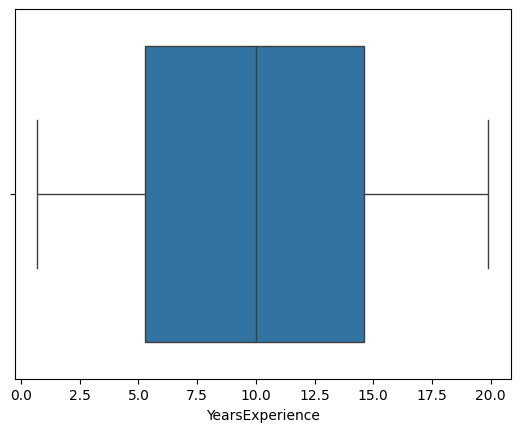

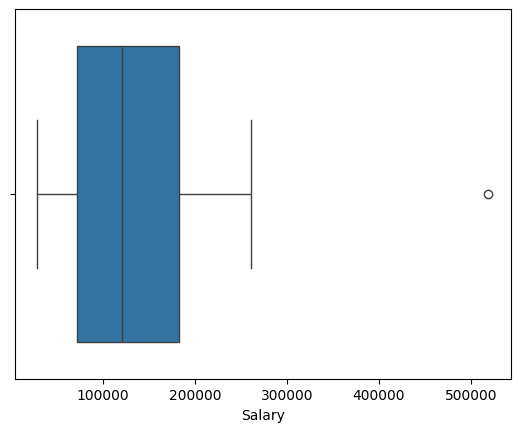

In [13]:
# Boxplot
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

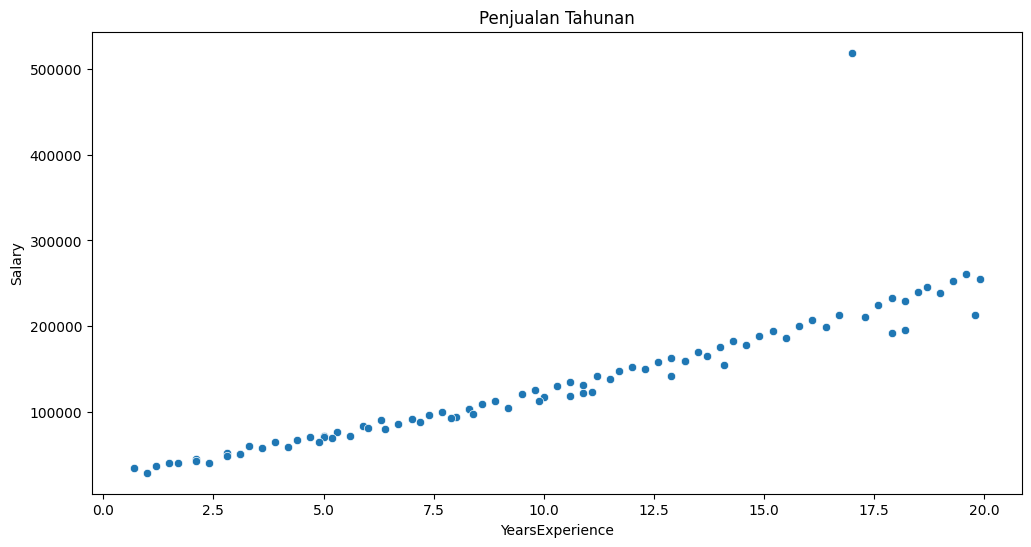

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=df, x="YearsExperience", y="Salary", ax=ax)

plt.title('Penjualan Tahunan')
plt.show()

### 2.2 Penanganan Missing Value

In [15]:
# Jumlah missing value
df.isnull().sum()

YearsExperience    1
Salary             1
dtype: int64

In [16]:
# Isi nilai hilang dengan rata - rata
df['YearsExperience'].fillna(df['YearsExperience'].mean())

0      0.7
1      1.2
2      1.0
3      1.5
4      2.1
      ... 
85     1.7
86    12.9
87    10.6
88     8.4
89    19.8
Name: YearsExperience, Length: 90, dtype: float64

### 2.3 Penanganan Data Duplikat

In [17]:
# Jumlah data duplikat
df.duplicated().sum()

np.int64(2)

In [18]:
# Cek baris data duplikat
df[df.duplicated(keep=False)]

,YearsExperience,Salary
27,8.3,103311.0
28,8.3,103311.0
45,13.2,158991.0
46,13.2,158991.0


In [19]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

In [20]:
# Cek kembali jumlah data duplikat
df.duplicated().sum()

np.int64(0)

## 3. Modeling

### 3.1 Memisah Dependent dan Independent

In [21]:
X = df['YearsExperience']
y = df['Salary']

print("independent =" , X.shape)
print("Dependent =", y.shape)

independent = (88,)
Dependent = (88,)


### 3.2 Split Data

In [22]:
def split_data(X, y, train_size=0.8, random_state=42):
    np.random.seed(random_state)
    idx = np.random.permutation(len(X))
    split_ratio = int(train_size * len(X))

    X_train, X_test = X.iloc[idx[:split_ratio]], X.iloc[idx[split_ratio:]]
    y_train, y_test = y.iloc[idx[:split_ratio]], y.iloc[idx[split_ratio:]]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

### 3.3 OLS Statistik

In [23]:
# Mencari Koefisien -> kenaikan gaji setiap tahun
slope = (len(X) * np.sum(X * y) - np.sum(X) * np.sum(y)) / (len(X) * np.sum(X**2) - np.sum(X)**2) 
slope

np.float64(11190.863497680692)

In [24]:
# Mencari Bias -> gaji tanpa pengalaman
intercept = (np.sum(y) - slope * np.sum(X)) / len(X)
intercept

np.float64(18815.670037463497)

In [25]:
# Mencari Prediksi
y_pred = slope * X_test + intercept
y_pred

61    215774.867597
65    228084.817444
77    176606.845355
38    144153.341211
30    118414.355167
1      32244.706235
54    192274.054252
21     93794.455472
2      30006.533535
23     99389.887221
83     90437.196423
76    222489.385695
84    219132.126646
20     89318.110073
62    219132.126646
73     42316.483383
14     74769.987526
53    188916.795202
Name: YearsExperience, dtype: float64

## 4. Evaluasi Model

### 4.1 R-squared

In [26]:
#R-squared
RSS = np.sum((y_test - y_pred) ** 2)
TSS = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (RSS / TSS)
r2

np.float64(0.9657705177638175)

96,58% variasi gaji berpengaruh pada pengalaman kerja, sedangkan sekitar 3,42% dipengaruhi hal lain selain pengalam kerja. 

### 4.2 MSE dan RMSE

In [1]:
# MSE 
mse = np.mean((y_test - y_pred) ** 2)

# RMSE
rmse = np.sqrt(mse)

NameError: name 'np' is not defined

### 4.3 MAE

In [28]:
# MAE
mae = np.mean(np.abs(y_test - y_pred))

### 4.4 Hasil Evaluasi

In [29]:
print("Evaluasi Model")
print(f"R2  : {r2}")
print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE : {mae:,.2f}")

Evaluasi Model
R2  : 0.9657705177638175
MSE : 165,058,611.57
RMSE: 12,847.51
MAE : 9,767.24


## 5. Grafik Prediksi

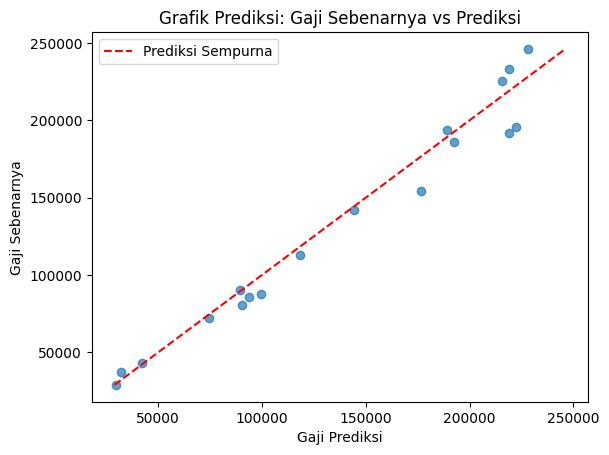

In [30]:
plt.scatter(y_pred, y_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Prediksi Sempurna')
plt.xlabel('Gaji Prediksi')
plt.ylabel('Gaji Sebenarnya')
plt.title('Grafik Prediksi: Gaji Sebenarnya vs Prediksi')
plt.legend()
plt.show()

## Kesimpulan

Model regresi linear ini cukup efektif untuk memprediksi gaji berdasarkan pengalaman kerja, dengan 96,58% variasi gaji dapat dijelaskan dengan pengalaman kerja dan rata-rata kesalahan prediksi hanya sekitar Rp9,8 juta. 